K Means clustering algorithm works by first randomly picking some central points called centroids and each data point is then assigned to the closest centroid forming a cluster. After all the points are assigned to a cluster the centroids are updated by finding the average position of the points in each cluster. This process repeats until the centroids stop changing forming clusters. The goal of clustering is to divide the data points into clusters so that similar data points belong to same group.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from kneed import KneeLocator
import warnings

warnings.filterwarnings('ignore')

In [2]:
# Load dataset
X, y = make_blobs(n_samples=1000, centers=3, cluster_std=0.60, random_state=0)

# Print dataset details
print("Raw Dataset")
print("X shape:", X.shape)
print("y shape:", y.shape)
print("X sample:\n", X[:10])  # Print first 10 rows
print("y sample:\n", y[:10])

Raw Dataset
X shape: (1000, 2)
y shape: (1000,)
X sample:
 [[-1.09510311  2.76883068]
 [ 1.54632313  4.212973  ]
 [-1.51086098  3.02795241]
 [-1.27619179  2.89387103]
 [-2.12949764  2.31896722]
 [ 1.58206597  1.55444668]
 [-0.06914364  3.52184167]
 [-0.04749204  5.47425256]
 [ 2.00419816  0.55908304]
 [ 1.7677522   3.77433604]]
y sample:
 [2 0 2 2 2 1 0 0 1 0]


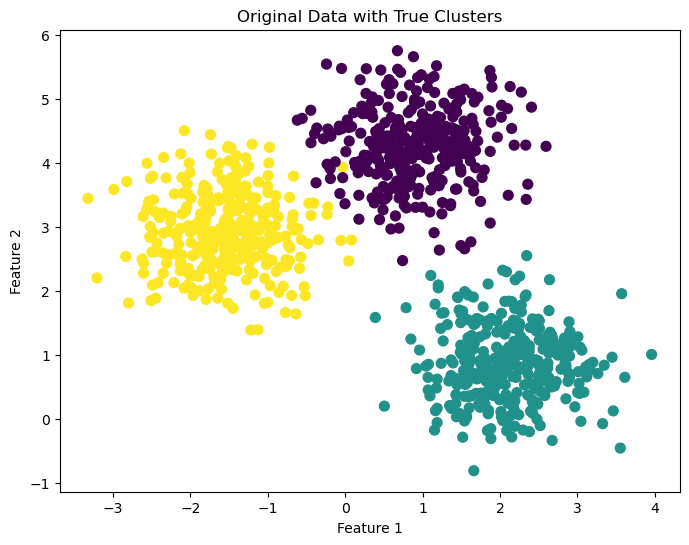

In [3]:
# Scatter plot of original clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=50)
plt.title("Original Data with True Clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [4]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Print train-test split details
print("Train-Test Split")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print("X_train sample:\n", X_train[:10])
print("X_test sample:\n", X_test[:10])

Train-Test Split
X_train shape: (800, 2)
X_test shape: (200, 2)
y_train shape: (800,)
y_test shape: (200,)
X_train sample:
 [[ 2.18874542e+00  8.44638346e-01]
 [ 1.32222457e+00  4.17880807e+00]
 [ 1.14683788e+00  5.34938860e+00]
 [-3.31063719e-03  3.36312669e+00]
 [ 2.35666447e+00  3.80303460e-01]
 [-1.91513613e+00  3.02062839e+00]
 [ 9.66860812e-01  4.40034423e+00]
 [-3.20822569e+00  2.20482761e+00]
 [ 3.95785239e+00  1.01136344e+00]
 [ 2.31659522e+00  5.38129093e-01]]
X_test sample:
 [[ 0.43899014  4.53592883]
 [ 1.5353791   4.50776632]
 [ 0.04601247  4.55417862]
 [-1.20390625  2.83241501]
 [ 0.90994568  4.91589095]
 [ 1.87271752  4.18069237]
 [ 2.81431422  1.02456187]
 [ 2.85027595  1.0208632 ]
 [ 0.88166987  5.65782143]
 [-0.08485299  4.5170764 ]]


In [6]:
# Scaling
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [7]:
# Print scaled data
print("Scaled Data")
print("X_train_sc sample:\n", X_train_sc[:10])
print("X_test_sc sample:\n", X_test_sc[:10])

Scaled Data
X_train_sc sample:
 [[ 1.05586767 -1.23886327]
 [ 0.52436382  0.98592756]
 [ 0.41678568  1.76702062]
 [-0.28868883  0.441648  ]
 [ 1.15886533 -1.54869993]
 [-1.46135838  0.21310921]
 [ 0.3063919   1.13375196]
 [-2.25450961 -0.33125003]
 [ 2.14099697 -1.12761265]
 [ 1.13428778 -1.44338765]]
X_test_sc sample:
 [[-0.01739176  1.22422347]
 [ 0.65510788  1.20543147]
 [-0.25843517  1.236401  ]
 [-1.02510642  0.08752011]
 [ 0.27148148  1.47776073]
 [ 0.86202346  0.9871849 ]
 [ 1.43957711 -1.11880574]
 [ 1.4616352  -1.12127375]
 [ 0.25413775  1.97282854]
 [-0.33870502  1.21164381]]


In [ ]:
# KMeans clustering - Fitting the model
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42) # Initialize KMeans

# Fit the model to the training data
kmeans.fit(X_train_sc)


In [10]:
# Predicting clusters for training data
y_pred_train = kmeans.predict(X_train_sc)

# Print predicted clusters
print("KMeans Cluster Assignments")
print("Predicted Clusters (Train):", np.unique(y_pred_train))
print("Predicted Cluster Labels (First 10 Train Samples):\n", y_pred_train[:10])

KMeans Cluster Assignments
Predicted Clusters (Train): [0 1 2]
Predicted Cluster Labels (First 10 Train Samples):
 [1 0 0 0 1 2 0 2 1 1]


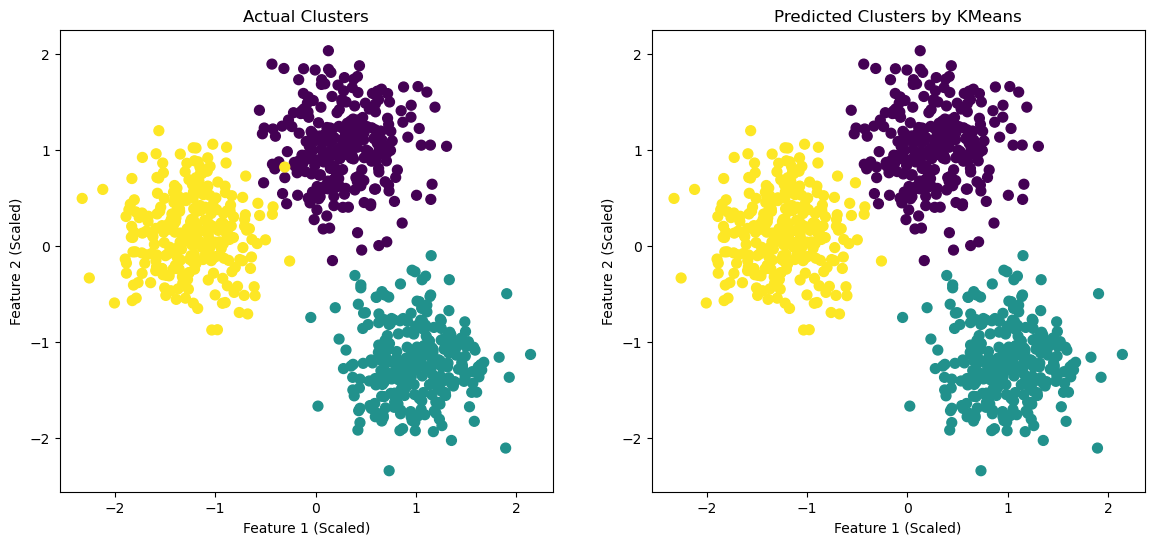

In [31]:
# Subplots for visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Actual clusters
axes[0].scatter(X_train_sc[:, 0], X_train_sc[:, 1], c=y_train, cmap='viridis', s=50)
axes[0].set_title("Actual Clusters")
axes[0].set_xlabel("Feature 1 (Scaled)")
axes[0].set_ylabel("Feature 2 (Scaled)")

# Predicted clusters
axes[1].scatter(X_train_sc[:, 0], X_train_sc[:, 1], c=y_pred_train, cmap='viridis', s=50)
axes[1].set_title("Predicted Clusters by KMeans")
axes[1].set_xlabel("Feature 1 (Scaled)")
axes[1].set_ylabel("Feature 2 (Scaled)")

plt.show()

In [30]:
# WCSS / Elbow Method
'''
WCSS - Within-Cluster Sum of Squares
WCSS is used in the Elbow Method to determine the optimal number of clusters for K-Means.
As the number of clusters increases, WCSS decreases because points are closer to their centroids.
The "elbow point" in the WCSS plot indicates the optimal number of clusters, where adding more clusters does not significantly reduce WCSS.
'''
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_train_sc)
    wcss.append(kmeans.inertia_)
    
# Print WCSS values
print("WCSS (Elbow Method)")
for i, val in enumerate(wcss, start=1):
    print(f"Clusters: {i}, WCSS: {val:.2f}")

WCSS (Elbow Method)
Clusters: 1, WCSS: 1600.00
Clusters: 2, WCSS: 646.87
Clusters: 3, WCSS: 229.05
Clusters: 4, WCSS: 200.95
Clusters: 5, WCSS: 173.32
Clusters: 6, WCSS: 149.62
Clusters: 7, WCSS: 135.09
Clusters: 8, WCSS: 118.05
Clusters: 9, WCSS: 97.82
Clusters: 10, WCSS: 90.53


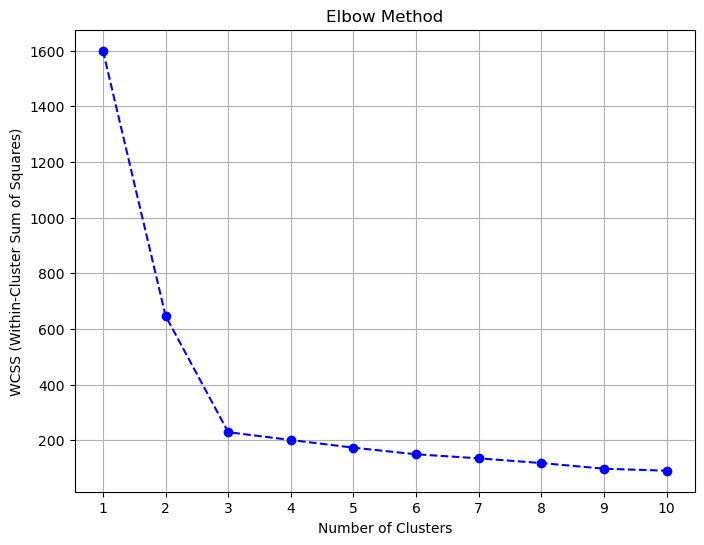

In [19]:
# Plot WCSS Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='b')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.xticks(range(1, 11))
plt.grid()
plt.show()

In [20]:
# KneeLocator to find optimal clusters
k1 = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')
print("\nOptimal number of clusters:", k1.elbow)


Optimal number of clusters: 3


In [32]:
# Silhouette Score Calculation
'''
Silhouette Score measures how similar an object is to its own cluster compared to other clusters.
Higher Silhouette Score indicates better-defined clusters.
It is commonly used to determine the optimal number of clusters in a dataset.
'''
silhouette_scores = []
for i in range(2, 11):  # Start from 2 (Silhouette Score is undefined for k=1)
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_train_sc)
    score = silhouette_score(X_train_sc, kmeans.labels_)
    silhouette_scores.append(score)
    
# Print silhouette scores
print("Silhouette Scores")
for i, score in enumerate(silhouette_scores, start=2):
    print(f"Clusters: {i}, Silhouette Score: {score:.4f}")

Silhouette Scores
Clusters: 2, Silhouette Score: 0.5681
Clusters: 3, Silhouette Score: 0.6475
Clusters: 4, Silhouette Score: 0.5331
Clusters: 5, Silhouette Score: 0.4404
Clusters: 6, Silhouette Score: 0.3223
Clusters: 7, Silhouette Score: 0.3236
Clusters: 8, Silhouette Score: 0.3258
Clusters: 9, Silhouette Score: 0.3505
Clusters: 10, Silhouette Score: 0.3453


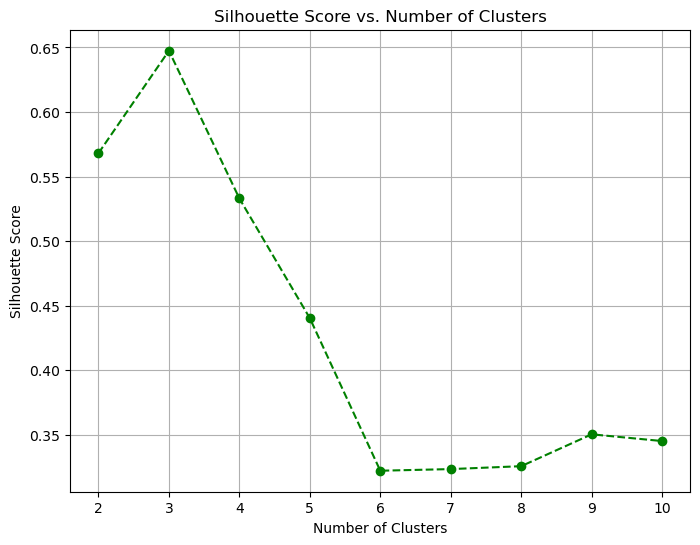

In [23]:
# Plot Silhouette Score
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--', color='g')
plt.title("Silhouette Score vs. Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.xticks(range(2, 11))
plt.grid()
plt.show()